In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [46]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=20

In [47]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1650 files belonging to 5 classes.


In [48]:
class_names=dataset.class_names
class_names

['0-Normal', '1-Doubtful', '2-Mild', '3-Moderate', '4-Severe']

In [49]:
len(dataset)

52

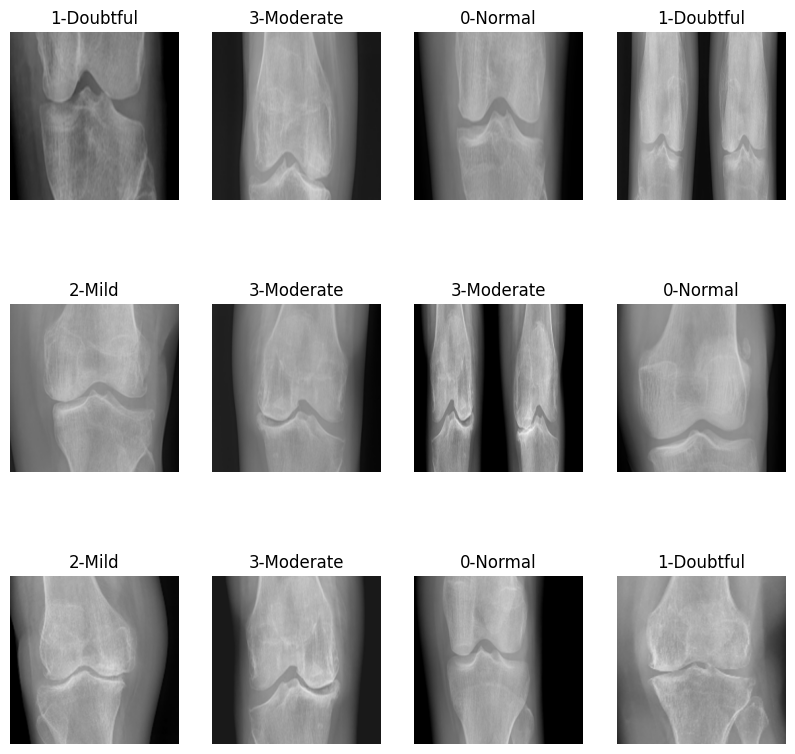

In [50]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [52]:
len(dataset)

52

In [53]:
# training 80%
# validation 10%
# testing 10%

In [54]:
train_size=0.8
len(dataset)*train_size

41.6

In [55]:
train_ds=dataset.take(41)
len(train_ds)

41

In [56]:
test_ds=dataset.skip(41)
len(test_ds)

11

In [57]:
val_size=0.1
len(dataset)*val_size

5.2

In [58]:
val_ds=test_ds.take(5)
len(val_ds)

5

In [59]:
test_ds=test_ds.skip(5)
len(test_ds)

6

In [60]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [61]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [62]:
len(train_ds)

41

In [63]:
len(val_ds)

5

In [64]:
len(test_ds)

6

In [65]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [66]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [67]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [70]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=5

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [71]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_5 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [72]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [73]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20


41/41 [==============================] - 103s 2s/step - loss: 1.5389 - accuracy: 0.3082 - val_loss: 1.5160 - val_accuracy: 0.3313
Epoch 2/20
41/41 [==============================] - 89s 2s/step - loss: 1.5258 - accuracy: 0.3112 - val_loss: 1.4733 - val_accuracy: 0.3250
Epoch 3/20
41/41 [==============================] - 87s 2s/step - loss: 1.5018 - accuracy: 0.3190 - val_loss: 1.4840 - val_accuracy: 0.3375
Epoch 4/20
41/41 [==============================] - 87s 2s/step - loss: 1.4917 - accuracy: 0.3228 - val_loss: 1.4796 - val_accuracy: 0.3500
Epoch 5/20
41/41 [==============================] - 86s 2s/step - loss: 1.4833 - accuracy: 0.3259 - val_loss: 1.4549 - val_accuracy: 0.3625
Epoch 6/20
41/41 [==============================] - 87s 2s/step - loss: 1.4810 - accuracy: 0.3320 - val_loss: 1.4543 - val_accuracy: 0.3187
Epoch 7/20
41/41 [==============================] - 86s 2s/step - loss: 1.4765 - accuracy: 0.3405 - val_loss: 1.4524 - val_accuracy: 0.3375
Epoch 8/20
41/41 [============

In [79]:
scores=model.evaluate(test_ds)

6/6 [==============================] - 3s 452ms/step - loss: 1.4677 - accuracy: 0.3177


In [80]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

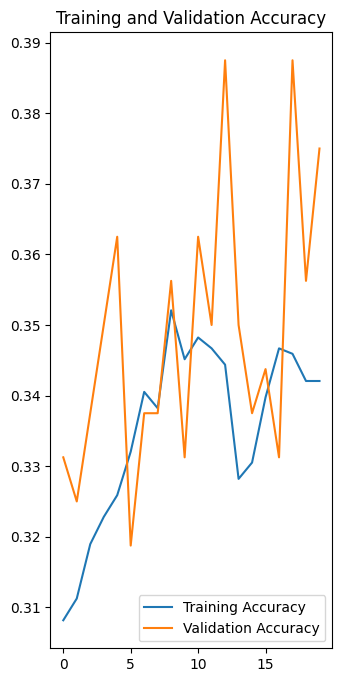

In [81]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
first image's actual label:  0-Normal
1/1 [==============================] - 1s 726ms/step
predicted label:  0-Normal


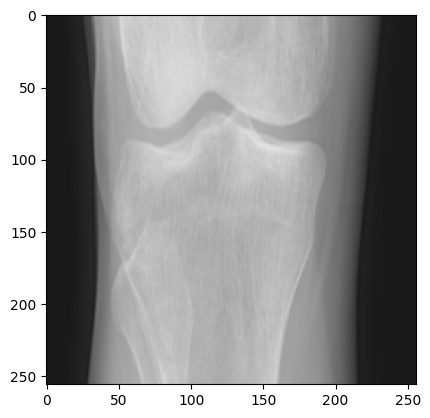

In [82]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print('first image to predict')
    plt.imshow(first_image)
    print("first image's actual label: ", class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])

In [83]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array, 0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 52ms/step


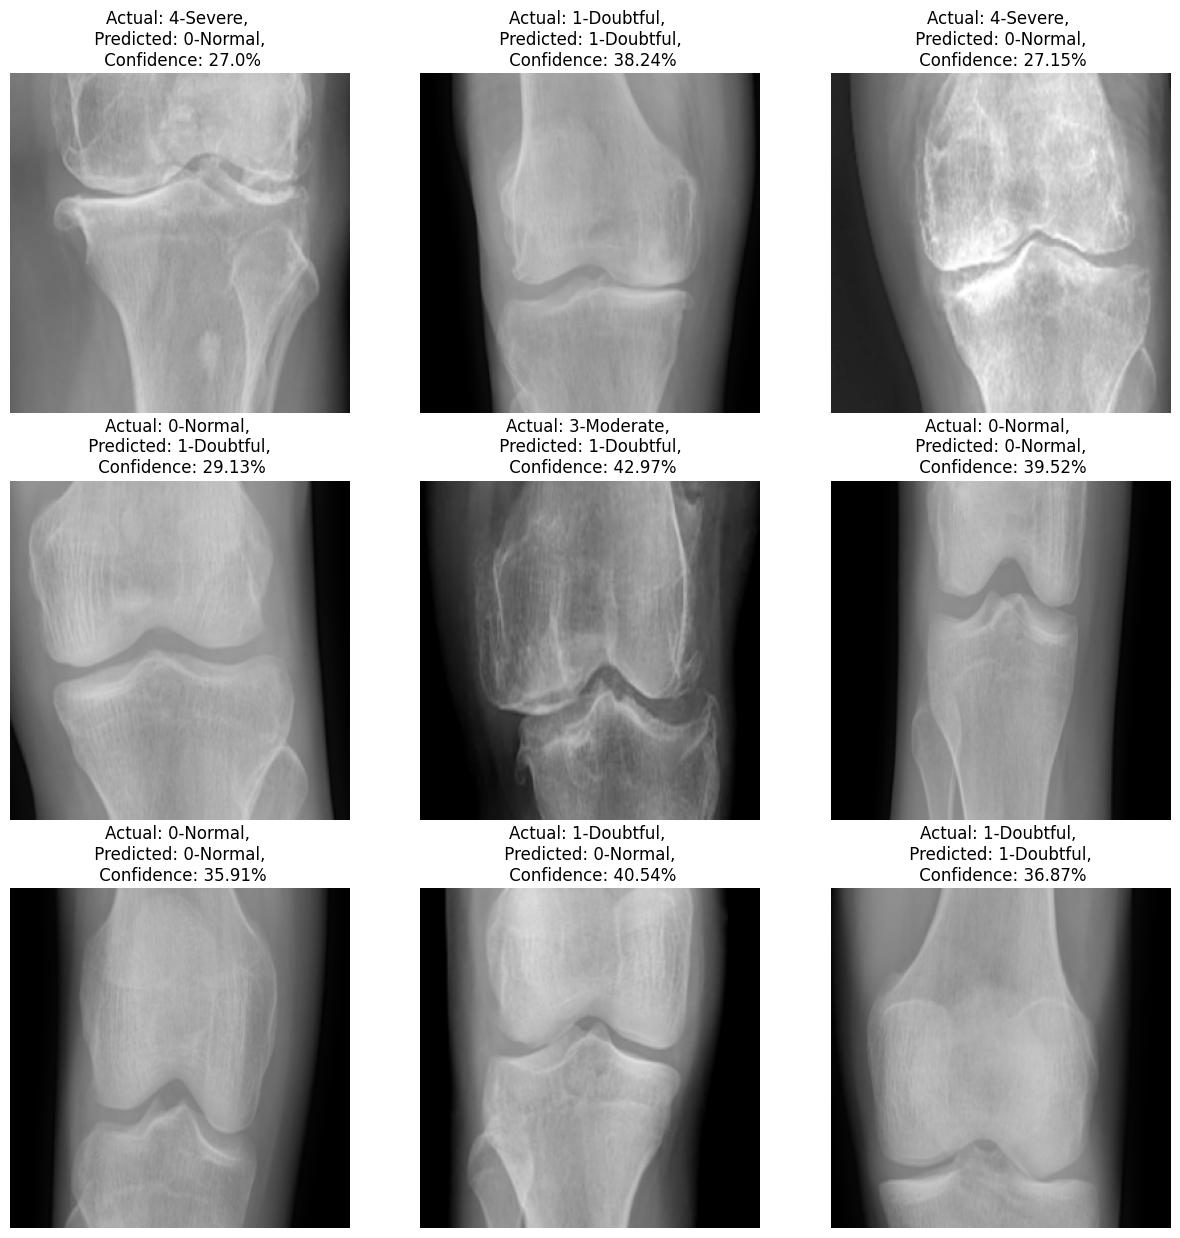

In [94]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence=predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        
        plt.axis("off")